# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_weather.csv"

# Range of latitudes and longitudes
lat_range = range(-90, 90, 5)
lon_range = range(-180, 180, 10)
lat_lon_list = []
for lat in lat_range:
    for lon in lon_range:
        lat_lon_list.append((lat, lon))
print(lat_lon_list)

[(-90, -180), (-90, -170), (-90, -160), (-90, -150), (-90, -140), (-90, -130), (-90, -120), (-90, -110), (-90, -100), (-90, -90), (-90, -80), (-90, -70), (-90, -60), (-90, -50), (-90, -40), (-90, -30), (-90, -20), (-90, -10), (-90, 0), (-90, 10), (-90, 20), (-90, 30), (-90, 40), (-90, 50), (-90, 60), (-90, 70), (-90, 80), (-90, 90), (-90, 100), (-90, 110), (-90, 120), (-90, 130), (-90, 140), (-90, 150), (-90, 160), (-90, 170), (-85, -180), (-85, -170), (-85, -160), (-85, -150), (-85, -140), (-85, -130), (-85, -120), (-85, -110), (-85, -100), (-85, -90), (-85, -80), (-85, -70), (-85, -60), (-85, -50), (-85, -40), (-85, -30), (-85, -20), (-85, -10), (-85, 0), (-85, 10), (-85, 20), (-85, 30), (-85, 40), (-85, 50), (-85, 60), (-85, 70), (-85, 80), (-85, 90), (-85, 100), (-85, 110), (-85, 120), (-85, 130), (-85, 140), (-85, 150), (-85, 160), (-85, 170), (-80, -180), (-80, -170), (-80, -160), (-80, -150), (-80, -140), (-80, -130), (-80, -120), (-80, -110), (-80, -100), (-80, -90), (-80, -80)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
# Create a set of random lat and lng combinations
# Identify nearest city for each lat, lng combination
    # If the city is unique, then add it to a our cities list
# Print the city count to confirm sufficient count

city_list = []
for lat, lon in lat_lon_list:
    city = citipy.nearest_city(lat, lon)
    name = city.city_name
    country = city.country_code
    city_list.append(name + "," + country)
city_unique = list(set(city_list))
print(f"{len(city_unique)} unique cities selected.")

589 unique cities selected.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
df = pd.DataFrame()
df['City Name'] = ''
df['Country Code'] = ''
df['Latitude'] = ''
df['Longitude'] = ''
df['Max Temperature (F)'] = ''
df['Humidity (%)'] = ''
df['Cloudiness (%)'] = ''
df['Wind Speed (mph)'] = ''
df['UTC Datetime'] = ''

url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_api_key,
    'units': 'imperial'
}
count = 0
for city in city_unique:
    params['q'] = city
    response = requests.get(url, params = params)
    if response.status_code == 200:
        data = response.json()
        df.loc[count, 'City Name'] = city.split(',')[0].title()
        df.loc[count, 'Country Code'] = city.split(',')[1].upper()
        df.loc[count, 'Latitude'] = data['coord']['lat']
        df.loc[count, 'Longitude'] = data['coord']['lon']
        df.loc[count, 'Max Temperature (F)'] = data['main']['temp_max']
        df.loc[count, 'Humidity (%)'] = data['main']['humidity']
        df.loc[count, 'Cloudiness (%)'] = data['clouds']['all']
        df.loc[count, 'Wind Speed (mph)'] = data['wind']['speed']
        df.loc[count, 'UTC Datetime'] = data['dt']
        
        print(f"Processing Record {count}, Latitude {data['coord']['lat']}: {city.split(',')[0].title()}")
        print(response.url.replace(weather_api_key,'*'*len(weather_api_key)))
        count += 1

print("-"*27)
print("Data Retrieval Complete")
print("-"*27)

=sun+valley%2Cus
Processing Record 394, Latitude 43.8: Urumqi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=urumqi%2Ccn
Processing Record 395, Latitude -8.14: Buala
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=buala%2Csb
Processing Record 396, Latitude 20.17: Hecelchakan
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=hecelchakan%2Cmx
Processing Record 397, Latitude 32.33: Rosarito
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=rosarito%2Cmx
Processing Record 398, Latitude 51.18: Ozinki
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=ozinki%2Cru
Processing Record 399, Latitude 21.32: Ewa Beach
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=ewa+beach%2Cus


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
df = df.infer_objects()
df.to_csv(output_data_file)
df.head(10)
# Extract relevant fields from the data frame
# Export the City_Data into a csv
# Show Record Count

,City Name,Country Code,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),UTC Datetime
0,Mahanoro,MG,-19.90,48.80,71.11,77,100,4.12,1605472159
1,Cumpas,MX,29.98,-109.78,81.27,16,0,2.51,1605472404
2,Tokonou,GN,9.65,-9.78,72.68,42,0,2.33,1605472404
3,Hermanus,ZA,-34.42,19.23,60.01,72,27,1.01,1605472373
4,Chivilcoy,AR,-34.90,-60.02,75.00,30,0,8.99,1605472404
5,Pisco,PE,-13.70,-76.22,73.40,64,0,12.75,1605472405
6,Rikitea,PF,-23.12,-134.97,75.65,78,97,10.67,1605472405
7,Vao,NC,-22.67,167.48,74.19,80,23,9.33,1605472405
8,Zyryanka,RU,65.75,150.85,-11.85,89,100,13.06,1605472405
9,Salalah,OM,17.02,54.09,77.00,69,0,4.70,1605472405


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

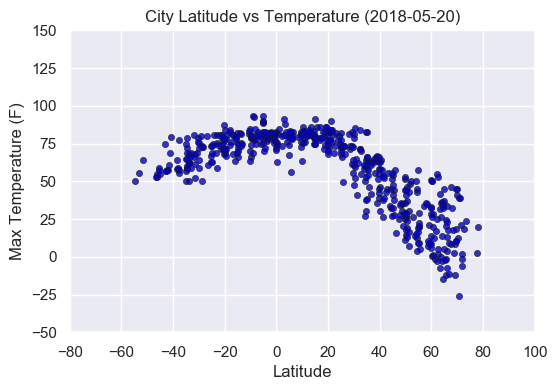

In [29]:
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']

sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Max Temperature (F)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-50, 150))
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Temperature (2018-05-20)')
None

#### Latitude vs. Humidity Plot

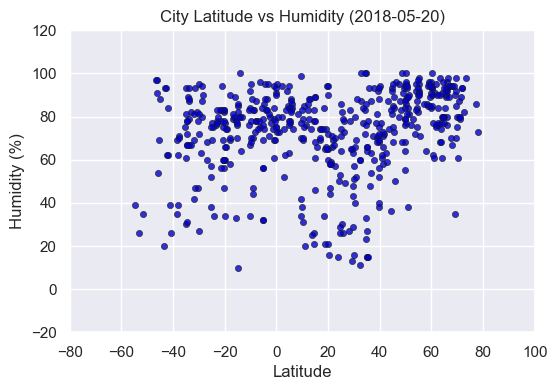

In [30]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Humidity (%)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.title('City Latitude vs Humidity (2018-05-20)')
None

#### Latitude vs. Cloudiness Plot

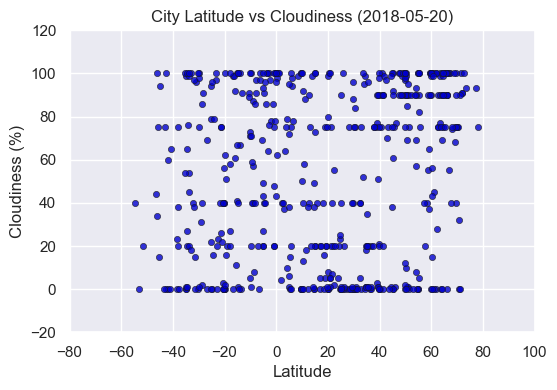

In [31]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Cloudiness (%)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.title('City Latitude vs Cloudiness (2018-05-20)')
None

#### Latitude vs. Wind Speed Plot

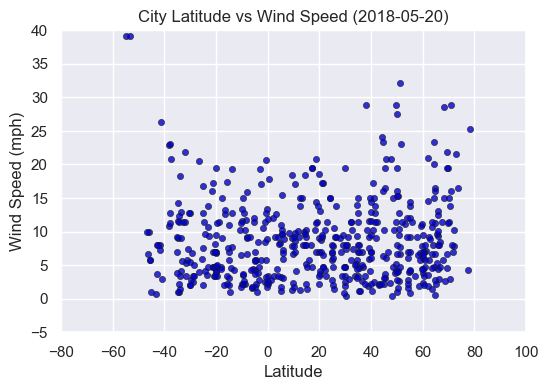

In [32]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Wind Speed (mph)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-5, 40))
plt.title('City Latitude vs Wind Speed (2018-05-20)')
None

## Linear Regression